# A2a - Signal Detection  
Finn Hittson - fxh157  
CSDS464  
Due: 02/06/2023  

## 1. Generating signals with events and additive noise

### 1a. Randomly occurring events in Gaussian noise

In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import random
import math

def genwaveform(N:int=100, a:float=0.1, A:float=1.0, s:float=1.0, noisetype:str="Gaussian"):
    waveform = []
    si = []
    for i in range(N):
        rand_val = np.random.normal(loc=0, scale=s)
        if noisetype.lower() == "uniform":
            rand_val = random.uniform(-s/2, s/2)
            if random.uniform(0,1) < a:
                rand_val += A
                si.append(i)
        elif random.uniform(0,1) < a:
            rand_val += A
            si.append(i)
        waveform.append(rand_val)
    return waveform, si

In [2]:
def plotwave(waveform, si, a:float=0.1, A:float=1.0, s:float=1.0, noisetype:str="Gaussian", th:float=None):
    plt.plot(list(range(len(waveform))), waveform)
    loc_vals = []
    if th is not None:
        plt.plot([0,len(waveform)], [th, th], '--k', label="threshold")
        tpx = []
        tpy = []
        tnx = []
        tny = []
        fpx = []
        fpy = []
        fnx = []
        fny = []
        si_idx = 0
        for idx, val in enumerate(waveform):
            if val >= th and idx in si:
                tpx.append(idx)
                tpy.append(waveform[idx])
                si_idx += 1
            elif val >= th and idx not in si:
                fpx.append(idx)
                fpy.append(waveform[idx])
            elif val <= th and idx in si:
                fnx.append(idx)
                fny.append(waveform[idx])
                si_idx += 1
            elif val <= th and idx not in si:
                tnx.append(idx)
                tny.append(waveform[idx])
        plt.scatter(tpx, tpy, c='r', marker="o", zorder=10, data="tp", edgecolor='k', label="tp")
        plt.scatter(fpx, fpy, c='y', marker="v", zorder=10, data="fp", edgecolor='k', label="fp")
        plt.scatter(fnx, fny, c='g', marker="s", zorder=10, data="fn", edgecolor='k', label="fn")
        plt.legend(loc="lower right")
    else:
        for loc in si:
            loc_vals.append(waveform[loc])
        plt.scatter(si, loc_vals, c='r', s=10, zorder=10, label=f"Underlying Signal\n A={A}, $\\alpha$={a}")
    plt.xlabel("Time $t$, (sec)", fontsize=16)
    plt.ylabel("Amplitude, (relative)", fontsize=16)
    plt.title(f"Randomly Occuring Events in {noisetype.lower().capitalize()} Noise", fontsize=18)
    if noisetype.lower() == "uniform":
        plt.ylim([-s/2-0.1, max(waveform)+0.3])
    plt.legend()
    plt.show()

Example 1: Generate and plot the signal with the following signal parameters:
```
genwaveform(N=100, α=0.05, A=2, σ=1, noisetype=:Gaussian)
```

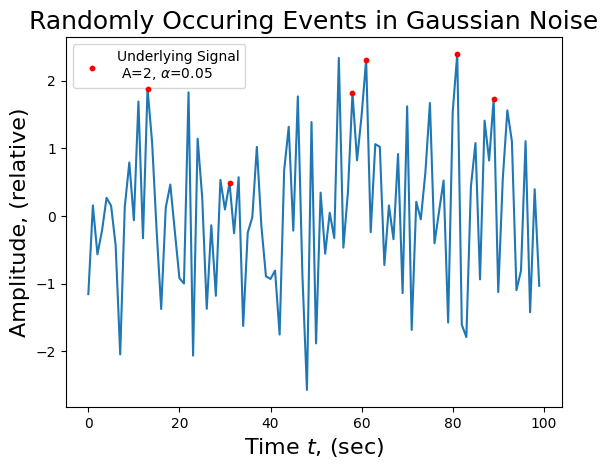

In [3]:
waveform, si = genwaveform(N=100, a=0.05, A=2, s=1, noisetype="Gaussian")
plotwave(waveform, si, a=0.05, A=2)

## 1b. Signals in Uniform Noise

Example 2: Generate and plot the signal with the following signal parameters:
```
genwaveform(N=100, α=0.05, A=1, μ=0, σ=2, noisetype=:uniform)
```

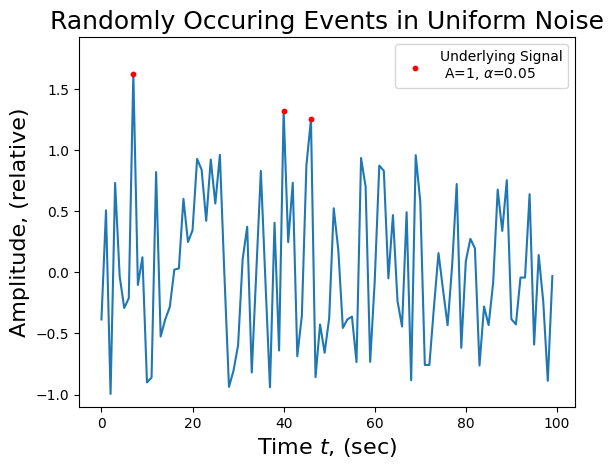

In [4]:
waveform, si = genwaveform(N=100, a=0.05, A=1, s=2, noisetype="uniform")
plotwave(waveform, si, a=0.05, A=1, s=2, noisetype="uniform")

Example 3: Plot a signal with high SNR.

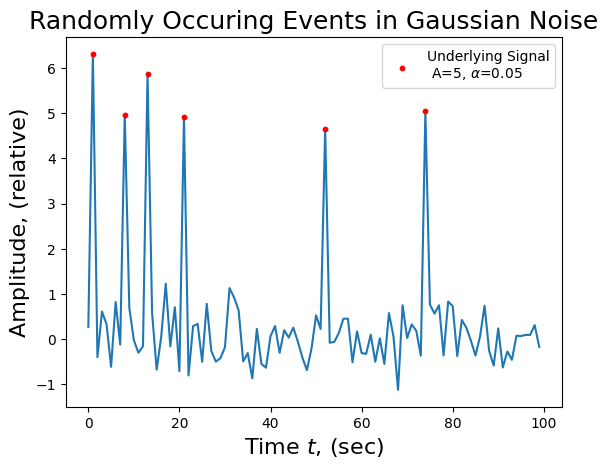

In [5]:
waveform, si = genwaveform(N=100, a=0.05, A=5, s=0.5, noisetype="Gaussian")
plotwave(waveform, si, a=0.05, A=5, s=0.5)

Example 4: Plot a signal with low SNR.

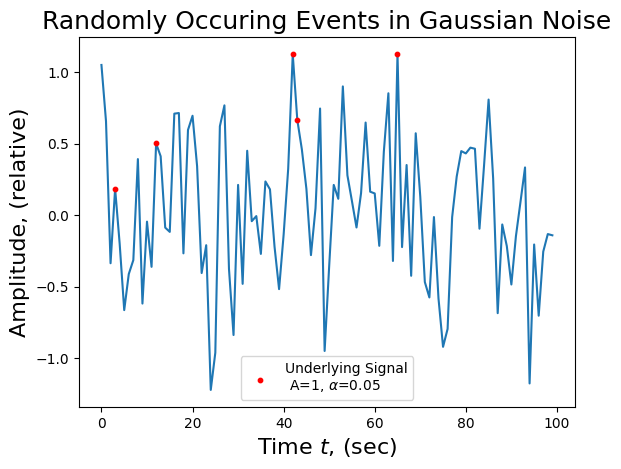

In [6]:
waveform, si = genwaveform(N=100, a=0.05, A=1, s=0.5, noisetype="Gaussian")
plotwave(waveform, si, a=0.05, A=1, s=0.5)

### 1c. Notation
The following equation is an expression for signal $x[t]$ as a sum of $N$ events with amplitude $A$ that occur at times $\tau_i$.
\begin{align}
x[t]=\sum_{i=1}^NA\cdot\delta[t-\tau_i]
\end{align}
The following equation is an expression for the noise $\epsilon[t]$ that is distributed according to the Normal distribution with mean $\mu$ and variance $\sigma^2$.
\begin{align}
\epsilon[k]\sim N(\mu,\sigma^2)
\end{align}

\begin{align}
\mathbb{P}[\epsilon[t]=k]=\frac{1}{\sigma\sqrt{2\pi}}exp\left(-\frac{1}{2}\left(\frac{k-\mu}{\sigma}\right)^2\right)
\end{align}

### 1d. Conditional probability
The following equation is an expression for the probability distribution of the waveform at time $t$ given that there is a signal.
\begin{align}
y[t]\sim N(\mu+A,\sigma^2)
\end{align}

\begin{align}
\mathbb{P}[y[t]=k]=\frac{1}{\sigma\sqrt{2\pi}}exp\left(-\frac{1}{2}\left(\frac{k-\mu-A}{\sigma}\right)^2\right)
\end{align}

## 2. Signal Detection

### 2a. Effect of parameters on detection probability
As the amplitude decreases the underlying signal's waveform become more alike the noise and thus harder to detect. The following plots show the effects of lowering the underlying signals amplitude to $0.1$ for Gaussian and Uniform noise.

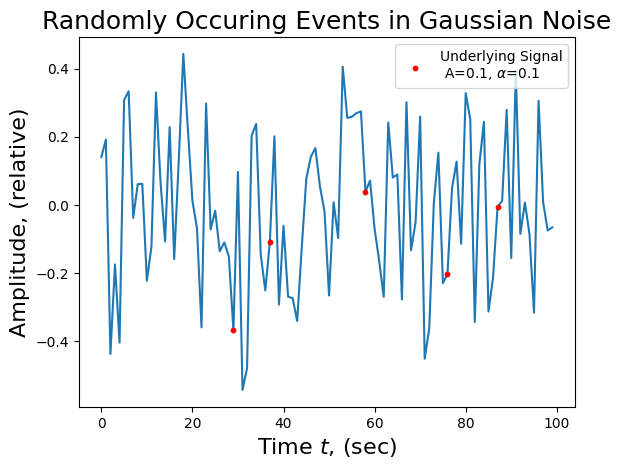

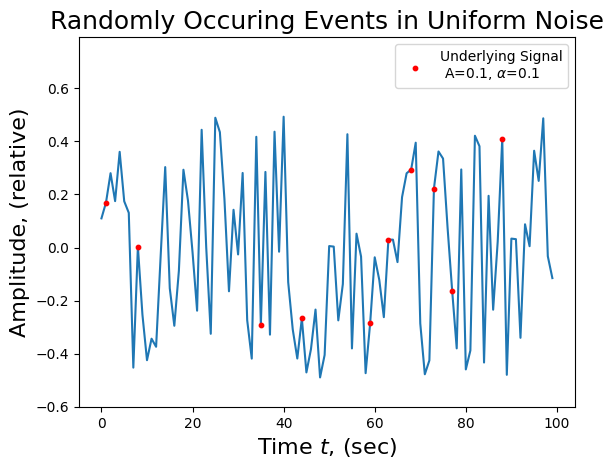

In [7]:
A = 0.1
s=0.25
waveform, si = genwaveform(A=A,s=s)
plotwave(waveform, si, A=A,s=s)
noisetype="Uniform"
waveform, si = genwaveform(A=A, noisetype=noisetype)
plotwave(waveform, si, A=A, noisetype=noisetype)

Increasing $\alpha$ make it more likely that an underlying signal occurs and decreasing it has the opposite effect. The following plots show the effect of increasing $\alpha$ wich causes more underlying signal events to occur.

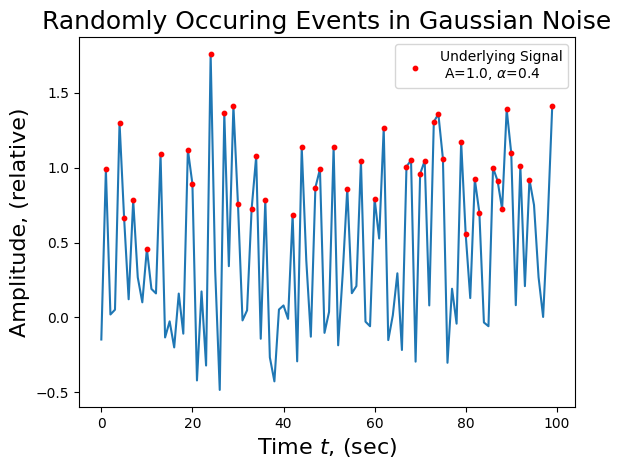

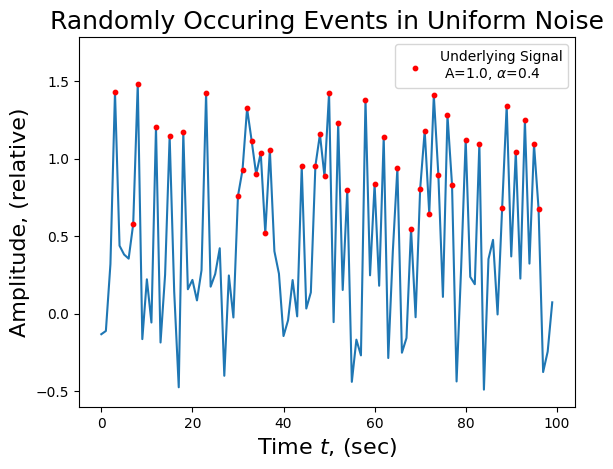

In [8]:
a = 0.4
s = 0.25
waveform, si = genwaveform(a=a,s=s)
plotwave(waveform, si, a=a,s=s)
noisetype="Uniform"
waveform, si = genwaveform(a=a, noisetype=noisetype)
plotwave(waveform, si, a=a, noisetype=noisetype)

Decreasing $\sigma$ causes the noise to decrease and increasing has the opposite affect. The following plots are for when $\sigma$ is small and large. When $\sigma$ is large the signal is difficult to separate from the noise.

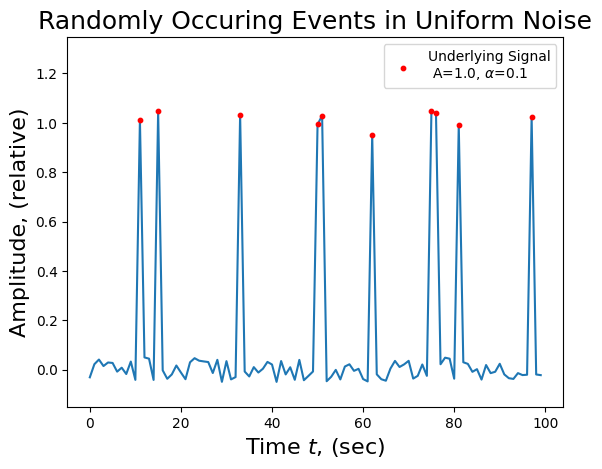

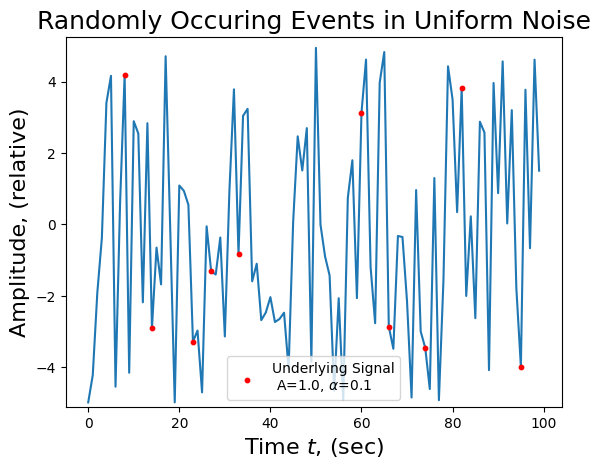

In [9]:
s=0.1
noisetype="Uniform"
waveform, si = genwaveform(s=s, noisetype=noisetype)
plotwave(waveform, si, s=s, noisetype=noisetype)
s=10
noisetype="Uniform"
waveform, si = genwaveform(s=s, noisetype=noisetype)
plotwave(waveform, si, s=s, noisetype=noisetype)

### 2b. Types of detections and detection errors

In [10]:
from collections import namedtuple

errors = namedtuple('errors', 'tp fn fp tn')
def detectioncounts(si, y, theta):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for idx, val in enumerate(y):
        if val >= theta and idx in si:
            tp += 1
        elif val >= theta and idx not in si:
            fp += 1
        elif val <= theta and idx in si:
            fn += 1
        elif val <= theta and idx not in si:
            tn += 1
    return errors(tp, fn, fp, tn)

Example 5: Plot a signal with a threshold and visualized true positives, false positives and false negatives.

tp:5, fn:7, fp:15, tn:73


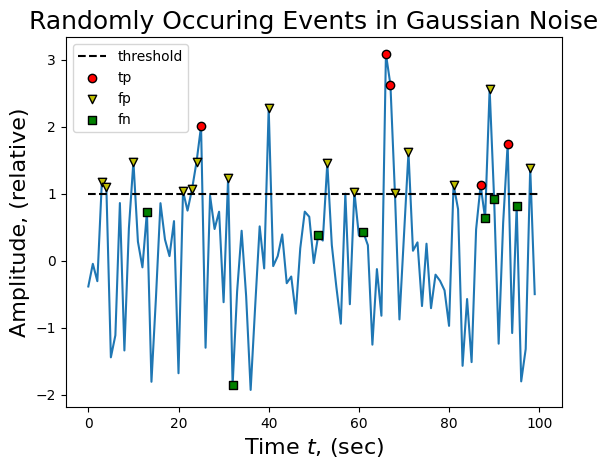

In [11]:
waveform, si = genwaveform(A=1)
th=1
noisetype="Gaussian"
err = detectioncounts(si, waveform, theta=th)
print(f"tp:{err.tp}, fn:{err.fn}, fp:{err.fp}, tn:{err.tn}")
plotwave(waveform, si, th=th)

### 2c. Detection probabilities

\begin{align}
\textrm{false positive:}\ \mathbb{P}\left[y[t]\ge\theta\right]=1-\int_{-\infty}^\theta\frac{1}{\sigma\sqrt{2\pi}}exp\left(\frac{-(t-\mu)^2}{2\sigma^2}\right)dt
\end{align}

\begin{align}
\textrm{false negative:}\ \mathbb{P}[y[t]\lt\theta]=\int_{-\infty}^\theta\frac{1}{\sigma\sqrt{2\pi}}exp\left(\frac{-(t-\mu-A)^2}{2\sigma^2}\right)dt.
\end{align}

In [20]:
def falsepos(th:float=0.5, s:float=1.0, noisetype:str="Gaussian"):
    if noisetype.lower() == "uniform":
        return 1 - th
    return (1 - a) * (1 - norm.cdf(th, loc=0, scale=s))

def falseneg(th:float=0.5, A:float=1.0, s:float=1.0, noisetype:str="Gaussian"):
    if noisetype.lower() == "uniform":
        return 1 - th
    return a * norm.cdf(th, loc=A, scale=s)

def truepos(th:float=0.5, A:float=1.0, s:float=1.0, noisetype:str="Gaussian"):
    if noisetype.lower() == "uniform":
        return th
    return a * (1 - norm.cdf(th, loc=A, scale=s))

def trueneg(th:float=0.5, s:float=1.0, noisetype:str="Gaussian"):
    if noisetype.lower() == "uniform":
        return th
    return (1 - a) * norm.cdf(th, loc=0, scale=s)

Example 6: What is the analytic probability of a false positive for the following parameters: 
```
θ=2, α=0.25, A=2, μ=0, σ=1, noisetype=:Gaussian
```

In [21]:
falsepos(th=2, s=1) / (1-a)

0.02275013194817921

## 3. ROC Curves

### 3a. Threshold Considerations
There is not an optimal threshold value because there is always a chance that noise will be greater than a legitimate signal so it is impossible to classify all signal points upside the threshold as true positive. Minimizing the total error probability is the threshold that finds the common ground that minimizes both the false positive and false negative rate. This means that its position will be a compromize that may classify some positive signals as noise and some noise as a positive signal. This is different from minimizing the total number of errors because that would result in a boundary that is overfitting the data and thus a poor classifier on novel data sets. 

### 3b. ROC Plot

In [45]:
def plotROC(y, si, a:float=0.1, A:float=1.0, N:int=100, optimal_th:bool=False):
    ths = np.linspace(min(y), max(y), N)
    fp_rate = []
    tp_rate = []
    min_err = math.inf
    fp_min = 0
    tp_max = 0
    op_th = -1
    for th in ths:
        err = detectioncounts(si, y, th)
        if err.fp + err.fn < min_err:
            min_err = err.fp + err.fn
            #fp_min = err.fp/(err.fp+err.tn)
            #tp_max = err.tp/(err.tp+err.fn)
            op_th = th
        fp_rate.append(err.fp/(err.fp+err.tn))
        tp_rate.append(err.tp/(err.tp+err.fn))
    plt.text(fp_min+0.02, tp_max, round(op_th,3))
    plt.scatter(fp_min, tp_max, s=50, zorder=10)
    plt.plot(fp_rate, tp_rate)
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)
    plt.title("ROC", fontsize=18)
    plt.show()
    if optimal_th:
        return op_th

Example 7: For the following parameters:
```
θ=2, α=0.25, A=2, μ=0, σ=1, noisetype=:Gaussian
```
What threshold value minimizes the total number of errors (false positives and false negatives)?

In [48]:
op_th = 0
N = 1000
for i in range(N):
    y, si = genwaveform(a=0.25, A=2, s=1, N=N)
    op_th += plotROC(y, si, a=0.25, A=2, N=len(y))
print(op_th/N)


KeyboardInterrupt: 

Example 8: Load the data "y50" and "i50" from the "A2a-testdata.h5" file.   Using a threshold of $1$, compute the detection counts using your function:
```
detectioncounts(i50, y50, 1)
```
What are the number of false positives?

In [39]:
import h5py

with h5py.File("A2a-testdata-zero-based-index.h5", 'r') as f:
    a_group_key = list(f.keys())[0]
    data = f[a_group_key]
    i50 = data.get('i50')
    y50 = data.get('y50')
    print(detectioncounts(i50, y50, theta=1).fp)  

9
